<a href="https://colab.research.google.com/github/Maria-Data-Analyst/riesgo_relativo/blob/Consultas-Query/Hito_3_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###CONJUNTO BALANCEADO DEFAULT_FLAG

In [ ]:
!pip install google-cloud-bigquery pandas openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()

## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery

# Configurar el cliente de BigQuery
client = bigquery.Client(project='riesgo-relativo-1')
# Definir la consulta para la vista
query = """
SELECT *
FROM `riesgo-relativo-1.dataset.tabla_consolidado`
"""
# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un DataFrame de pandas
df = results.to_dataframe()

In [ ]:
df_majority = df[df.default_flag == 1]
df_minority = df[df.default_flag == 0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

In [ ]:
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced.default_flag.value_counts())

default_flag
1    621
0    621
Name: count, dtype: Int64


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 44 to 2196
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   user_id                                  1242 non-null   object 
 1   age                                      1242 non-null   Int64  
 2   last_month_salary                        1242 non-null   float64
 3   number_dependents                        1242 non-null   Int64  
 4   default_flag                             1242 non-null   Int64  
 5   real_estate_loans                        1242 non-null   Int64  
 6   total_loans                              1242 non-null   Int64  
 7   using_lines_not_secured_personal_assets  1242 non-null   float64
 8   more_90_days_overdue                     1242 non-null   Int64  
 9   debt_ratio                               1242 non-null   float64
 10  age_range                                1242 non-nu

In [ ]:
df = df_balanced.drop(["malos_pagadores", "puntos", "using_lines_rr_flag", "more90_rr_flag",
                  "total_loans_rr_flag", "salary_rr_flag", "age_rr_flag", "debt_ratio",
                  "using_lines_not_secured_personal_assets", "more_90_days_overdue",
                  "total_loans", "real_estate_loans", "age",
                  "last_month_salary","user_id"], axis=1, inplace=True)

In [ ]:
# Seleccionar las columnas de tipo objeto
columnas_objeto = df_balanced.select_dtypes(include=['object']).columns

# Convertir las columnas de tipo objeto en dummies
df_dummies = pd.get_dummies(df_balanced, columns=columnas_objeto)

# Verifica las primeras filas del DataFrame con dummies
print(df_dummies.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 44 to 2196
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   number_dependents              1242 non-null   Int64
 1   default_flag                   1242 non-null   Int64
 2   age_range_21 - 35              1242 non-null   bool 
 3   age_range_36 - 46              1242 non-null   bool 
 4   age_range_47 - 63              1242 non-null   bool 
 5   age_range_64 - 95              1242 non-null   bool 
 6   salary_range_0 - 3947          1242 non-null   bool 
 7   salary_range_3948 - 5797       1242 non-null   bool 
 8   salary_range_5798 - 7495       1242 non-null   bool 
 9   salary_range_7496 - 150000     1242 non-null   bool 
 10  total_loans_range_1 - 4        1242 non-null   bool 
 11  total_loans_range_12 - 57      1242 non-null   bool 
 12  total_loans_range_5 - 8        1242 non-null   bool 
 13  total_loans_range_9 - 

In [ ]:
X = df_dummies.drop(["default_flag"],axis=1)
y=df_dummies["default_flag"]

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
#Utiliza la opción stratify en train_test_split para asegurar que la proporción de las clases en el
#conjunto de entrenamiento y prueba se mantenga similar a la del conjunto original. Esto garantiza que
#tanto el conjunto de entrenamiento como el de prueba contengan una representación proporcional de cada clase)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

Accuracy: 0.96
Confusion Matrix:
[[113   6]
 [  4 126]]


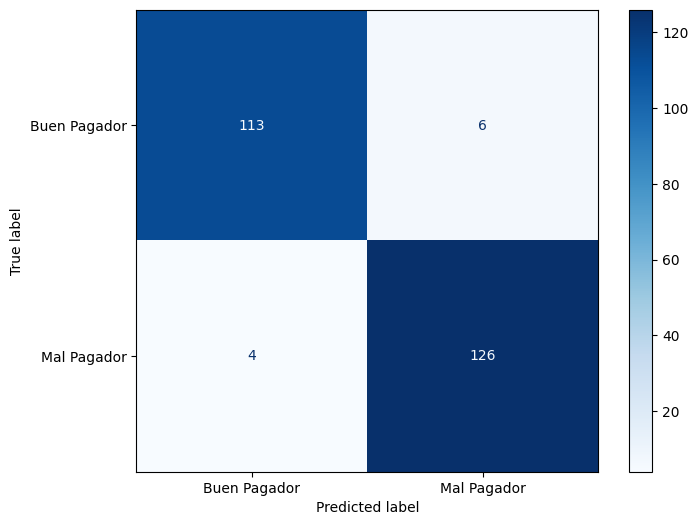

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       119
         1.0       0.95      0.97      0.96       130

    accuracy                           0.96       249
   macro avg       0.96      0.96      0.96       249
weighted avg       0.96      0.96      0.96       249



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Buen Pagador', 'Mal Pagador'])
fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico
conf_matrix.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')  # 'd' para formato decimal

# Reporte de clasificación
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

                          Feature  Coefficient
24     using_lines_range_1 - 8710     3.287371
15               more90_range_4-6     1.895598
14               more90_range_1-3     1.269057
16                more90_range_7+     0.767046
20  debt_ratio_range_0.89 - 36705     0.598850
2               age_range_36 - 46     0.543714
10      total_loans_range_12 - 57     0.483879
23    using_lines_range_0.7 - 0.9     0.405094
7        salary_range_5798 - 7495     0.327870
12       total_loans_range_9 - 11     0.321955
1               age_range_21 - 35     0.215012
19   debt_ratio_range_0.38 - 0.88     0.214759
0               number_dependents     0.175739
3               age_range_47 - 63     0.170604
5           salary_range_0 - 3947     0.142173
6        salary_range_3948 - 5797    -0.112763
18   debt_ratio_range_0.19 - 0.37    -0.254419
8      salary_range_7496 - 150000    -0.357351
9         total_loans_range_1 - 4    -0.389788
11        total_loans_range_5 - 8    -0.416117
17      debt_

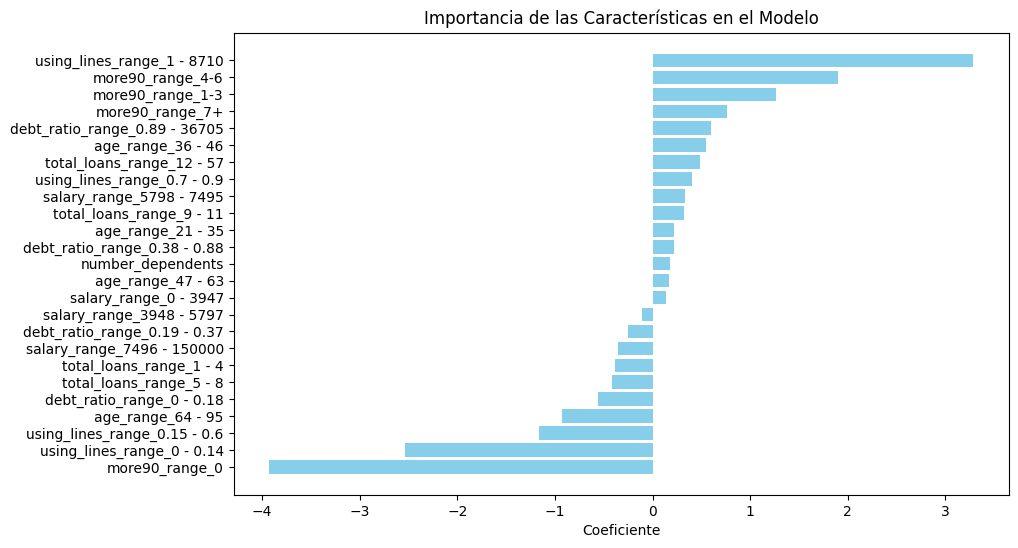

In [ ]:

# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Mostrar los coeficientes
print(coef_df)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características en el Modelo')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
### SIN BALANCEAR

In [ ]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()

## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery

# Configurar el cliente de BigQuery
client = bigquery.Client(project='riesgo-relativo-1')
# Definir la consulta para la vista
query = """
SELECT *
FROM `riesgo-relativo-1.dataset.tabla_consolidado`
"""
# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un DataFrame de pandas
df_s = results.to_dataframe()

In [ ]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35546 entries, 0 to 35545
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   user_id                                  35546 non-null  object 
 1   age                                      35546 non-null  Int64  
 2   last_month_salary                        35546 non-null  float64
 3   number_dependents                        35546 non-null  Int64  
 4   default_flag                             35546 non-null  Int64  
 5   real_estate_loans                        35546 non-null  Int64  
 6   total_loans                              35546 non-null  Int64  
 7   using_lines_not_secured_personal_assets  35546 non-null  float64
 8   more_90_days_overdue                     35546 non-null  Int64  
 9   debt_ratio                               35546 non-null  float64
 10  age_range                                35546

In [ ]:
df_s.drop(["malos_pagadores", "puntos", "using_lines_rr_flag", "more90_rr_flag",
                  "total_loans_rr_flag", "salary_rr_flag", "age_rr_flag", "debt_ratio",
                  "using_lines_not_secured_personal_assets", "more_90_days_overdue",
                  "total_loans", "real_estate_loans", "age",
                  "last_month_salary","user_id"], axis=1, inplace=True)

In [ ]:
# Seleccionar las columnas de tipo objeto
columnas_objeto = df_s.select_dtypes(include=['object']).columns
# Convertir las columnas de tipo objeto en dummies
df_s_dummies = pd.get_dummies(df_s, columns=columnas_objeto)
# Verifica las primeras filas del DataFrame con dummies
print(df_s_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35546 entries, 0 to 35545
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   number_dependents              35546 non-null  Int64
 1   default_flag                   35546 non-null  Int64
 2   age_range_21 - 35              35546 non-null  bool 
 3   age_range_36 - 46              35546 non-null  bool 
 4   age_range_47 - 63              35546 non-null  bool 
 5   age_range_64 - 95              35546 non-null  bool 
 6   salary_range_0 - 3947          35546 non-null  bool 
 7   salary_range_3948 - 5797       35546 non-null  bool 
 8   salary_range_5798 - 7495       35546 non-null  bool 
 9   salary_range_7496 - 150000     35546 non-null  bool 
 10  total_loans_range_1 - 4        35546 non-null  bool 
 11  total_loans_range_12 - 57      35546 non-null  bool 
 12  total_loans_range_5 - 8        35546 non-null  bool 
 13  total_loans_rang

In [ ]:
#X = df_s_dummies.drop(["default_flag","more90_range_1-3","more90_range_4-6","more90_range_7+"],axis=1)
X = df_s_dummies.drop(["default_flag"],axis=1)
y=df_s_dummies["default_flag"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
#Utiliza la opción stratify en train_test_split para asegurar que la proporción de las clases en el
#conjunto de entrenamiento y prueba se mantenga similar a la del conjunto original. Esto garantiza que
#tanto el conjunto de entrenamiento como el de prueba contengan una representación proporcional de cada clase
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
[[6954   32]
 [  74   50]]


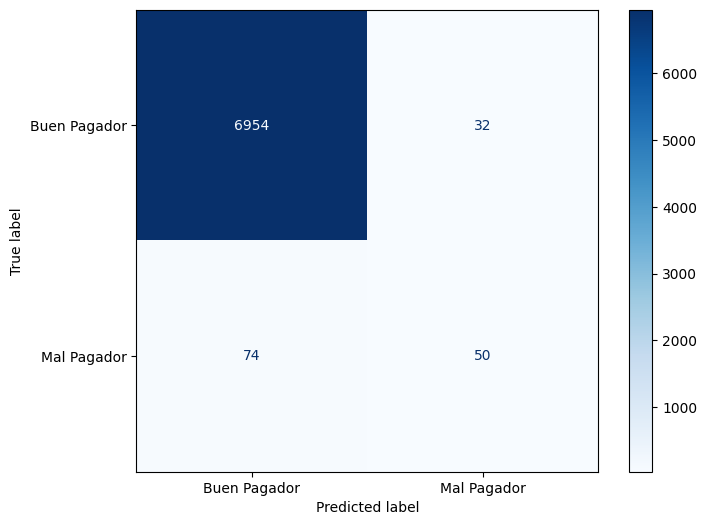

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6986
         1.0       0.61      0.40      0.49       124

    accuracy                           0.99      7110
   macro avg       0.80      0.70      0.74      7110
weighted avg       0.98      0.99      0.98      7110



In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Buen Pagador', 'Mal Pagador'])
fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico
conf_matrix.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')  # 'd' para formato decimal

# Reporte de clasificación
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

                          Feature  Coefficient
15               more90_range_4-6     2.890814
24     using_lines_range_1 - 8710     2.566824
16                more90_range_7+     1.551140
23    using_lines_range_0.7 - 0.9     0.697720
10      total_loans_range_12 - 57     0.544568
2               age_range_36 - 46     0.301576
12       total_loans_range_9 - 11     0.284278
20  debt_ratio_range_0.89 - 36705     0.242184
19   debt_ratio_range_0.38 - 0.88     0.239224
7        salary_range_5798 - 7495     0.233726
1               age_range_21 - 35     0.177871
14               more90_range_1-3     0.144867
5           salary_range_0 - 3947     0.130985
3               age_range_47 - 63     0.053605
0               number_dependents     0.013622
6        salary_range_3948 - 5797    -0.071185
11        total_loans_range_5 - 8    -0.123706
18   debt_ratio_range_0.19 - 0.37    -0.202362
17      debt_ratio_range_0 - 0.18    -0.279644
8      salary_range_7496 - 150000    -0.294125
4            

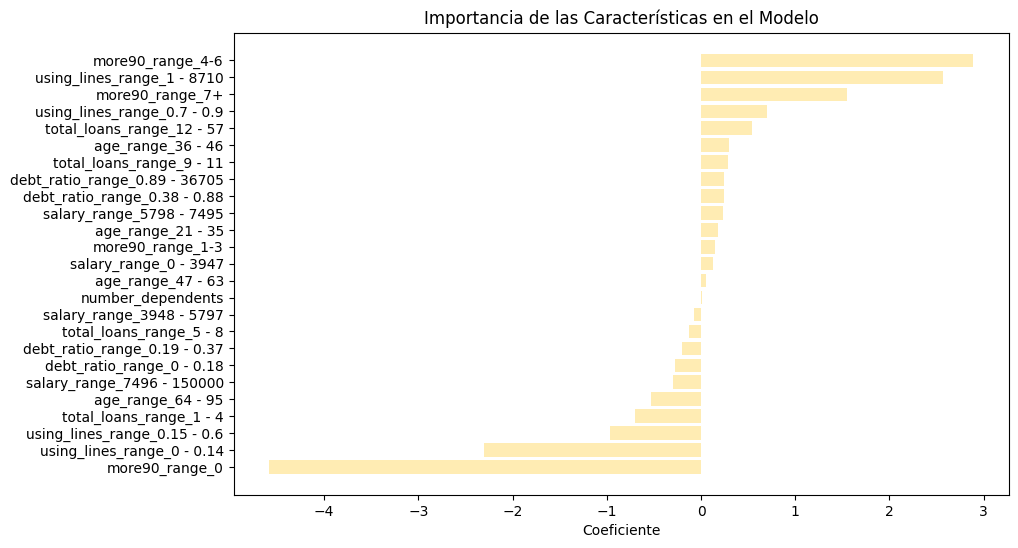

In [ ]:
# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Mostrar los coeficientes
print(coef_df)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='#ffecb3')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características en el Modelo')
plt.gca().invert_yaxis()
plt.show()